In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
from latticefold import *
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Protein Class

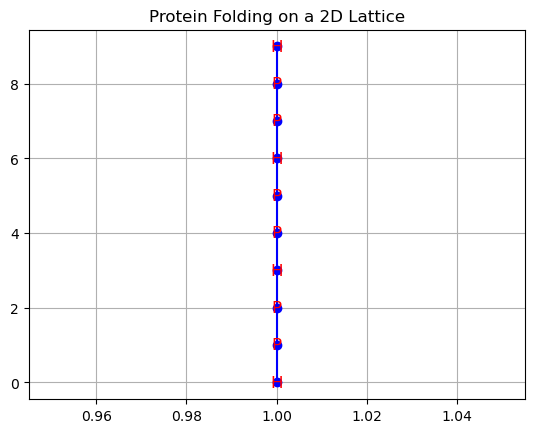

In [14]:
%autoreload
prot = Protein('HPPHPPHPPH')
visualize_lattice(positions=prot.structure, sequence=prot.sequence)
plt.show()

In [12]:
folding = prot.fold(max_iter=5000, temperature=10, cooling_rate=0.99)

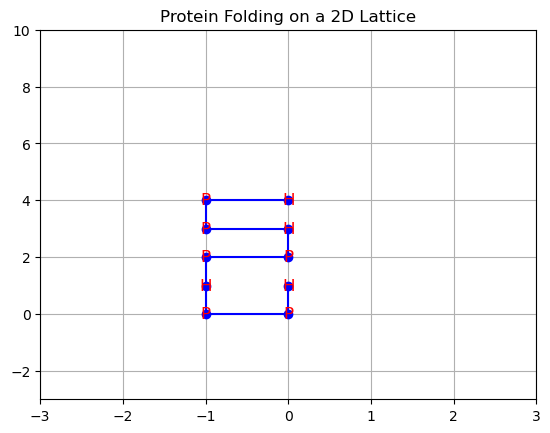

In [13]:
folding_gif(folding[::5], prot.sequence)

#### Changing the update rule

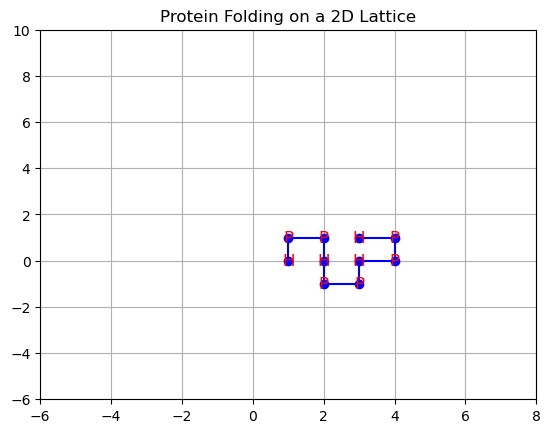

In [21]:
%autoreload
prot = Protein('HPPHPPHPPH')
folding_rot = prot.fold(max_iter=1000, temperature=10, cooling_rate=0.99, rule='rotation')
folding_gif(folding_rot[::5], prot.sequence,output_file='protein_folding_rot.gif')